In [1]:
# import all needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, make_scorer, \
accuracy_score 
from sklearn.model_selection import learning_curve, \
StratifiedKFold, train_test_split
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.decomposition import PCA
%matplotlib inline
name =  ['ID','MB','mean radius' ,'mean texture', 
         'mean perimeter' ,'mean area',
         'mean smoothness', 'mean compactness' ,
         'mean concavity',
         'mean concave points' ,'mean symmetry', 
         'mean fractal dimension',
         'radius error', 'texture error', 'perimeter error', 
         'area error',
         'smoothness error', 'compactness error', 'concavity error',
         'concave points error', 'symmetry error', 
         'fractal dimension error',
         'worst radius', 'worst texture', 'worst perimeter',
         'worst area', 'worst smoothness', 'worst compactness',
         'worst concavity', 'worst concave points', 
         'worst symmetry', 'worst fractal dimension']
from sklearn.datasets import load_breast_cancer
df = pd.read_csv('wdbc.txt', header = None, names = name)
cancer = load_breast_cancer()  # embeded dataset
n_samples, n_features = cancer.data.shape

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                         569 non-null int64
MB                         569 non-null object
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non

In [6]:
n_samples, n_features = df.shape
(n_samples, n_features)

(569, 32)

In [7]:
df.describe()

,ID,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df['MB'] = df['MB'].replace('M',0)
df['MB'] = df['MB'].replace('B',1)
corr_matrix = df.corr()
top = abs(corr_matrix["MB"]).sort_values(ascending=False)[1:4]
top

worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
Name: MB, dtype: float64

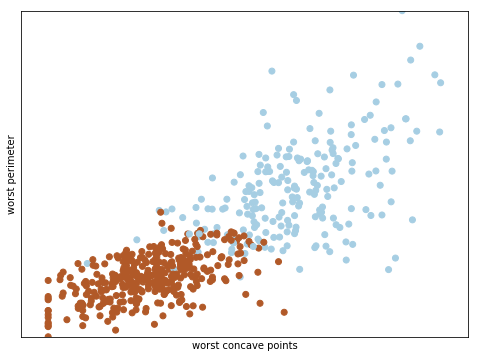

In [10]:
# First, we choose the 2 features with highest correlation 
# coefficient with target variable(MB).
X = df.loc[:, ['worst concave points', 'worst perimeter']].values
Y = cancer.target

x_min, x_max = X[:, 0].min() - .02, X[:, 0].max() + .02
y_min, y_max = X[:, 1].min() - .02, X[:, 1].max() + .02

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('worst concave points')
plt.ylabel('worst perimeter')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

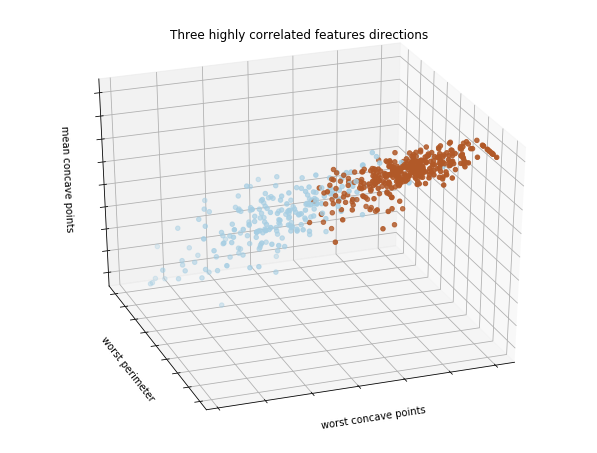

In [11]:
# Then we consider 3 features with highest correlation 
# coefficient with target variable(MB).
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = df.loc[:, ['worst concave points', 
                       'worst perimeter',
                       'mean concave points']].values
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], 
           X_reduced[:, 2], c=Y, cmap=plt.cm.Paired)
ax.set_title("Three highly correlated features directions")
ax.set_xlabel("worst concave points")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("worst perimeter")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("mean concave points")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Dicision Tree
First, I split the dataset to training data (80%) and testing data (20%).  
Then, I train the models with max_depth in range(1,10) using training data.  
Next, I choose the optimal hyperparameter based on the accuracy in testing data. 

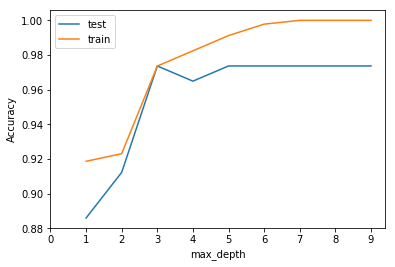

In [12]:
X = cancer.data
y = cancer.target
complexity_values = range(1,10)
# Split the data (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.2,
                                    random_state=20)
train_accuracies = []
test_accuracies=[]

for complexity_value in complexity_values:
    clf = tree.DecisionTreeClassifier(criterion="entropy", 
                                      max_depth=complexity_value,
                                      random_state=42)
    test_accuracies.append(clf.fit(X_train, y_train).score(\
                                    X_test, y_test))
    train_accuracies.append(clf.fit(X_train, y_train).score(\
                                    X_train, y_train))

line1, =plt.plot(complexity_values, test_accuracies,
                 label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,
                 label='train_accuracies')
plt.xlabel("max_depth")
plt.xticks((range(0,10)))
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

As showed in the graph, when max_depth = 3, the model performs best in the test data, and the accuracy on training
data and test data begins to differ drastically when n > 3, so I draw a conclusion that 3 would be the optimal
hyperparameter for the desicion tree model, when n goes larger, there will be an issue of overfitting.

Then I try to build the model based on another criterion 'gini', the result shows the same, that is, 3 would be the
best hyperparameter for this model.

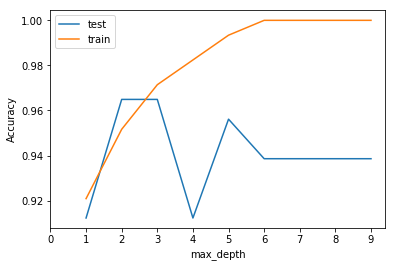

In [13]:
complexity_values = range(1,10)
train_accuracies = []
test_accuracies=[]

for complexity_value in complexity_values:
    clf = tree.DecisionTreeClassifier(criterion="gini",
                                      max_depth=complexity_value,
                                      random_state=40)
    test_accuracies.append(clf.fit(X_train, y_train).score(\
                            X_test, y_test))
    train_accuracies.append(clf.fit(X_train, y_train).score(\
                            X_train, y_train))

line1, =plt.plot(complexity_values, test_accuracies,
                 label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,
                 label='train_accuracies')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(range(10))
plt.legend((line1, line2), ('test', 'train'))
plt.show()

In [14]:
# Build the final decision tree model.
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  max_depth=3,random_state=40)
T_accuracy_decision_tree = clf.fit(X_train, y_train).score(\
                            X_test, y_test)
print('Accuracy on test data for decision tree model: ' + 
      str(np.round(T_accuracy_decision_tree,4)))

Accuracy on test data for decision tree model: 0.9737


### Logistic Regression

In [15]:
from sklearn import linear_model
y_lo = df['MB'].values
X_lo = df.drop(['ID', 'MB'], axis = 1).values

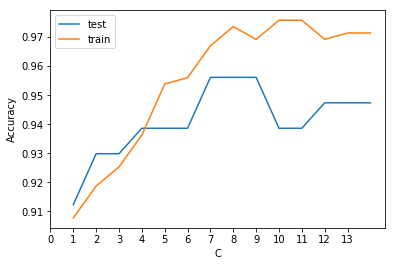

In [16]:
a = list(range(-5,9))
complexity_values = [10**i for i in a]
xticks = list(range(1, len(complexity_values)+1))
train_accuracies = []
test_accuracies=[]

for complexity_value in complexity_values:
    clf = linear_model.LogisticRegression(C=complexity_value)
    test_accuracies.append(clf.fit(X_train, y_train).score(\
                            X_test, y_test))
    train_accuracies.append(clf.fit(X_train, y_train).score(\
                            X_train, y_train))

line1, =plt.plot(xticks, test_accuracies,label='test_accuracies')
line2, =plt.plot(xticks, train_accuracies,label='train_accuracies')
plt.xlabel("C")
plt.xticks((range(0,len(xticks))))
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

The result shows that the optimal hyper parameter C is 10^7.

In [18]:
clf = linear_model.LogisticRegression(C=10000000, random_state=40)
T_accuracy_Logistic = clf.fit(X_train, y_train).score(\
                                X_test, y_test)
print('Accuracy on test data for Logistic model: ' + 
      str(np.round(T_accuracy_Logistic,4)))

Accuracy on test data for Logistic model: 0.9474


### K-nearest Neighbors

In [21]:
# The simplest possible classifier is the nearest neighbor:
# given a new observation X_test, find in the training set (i.e.
# the data used to train the estimator) the observation(s) 
# with the closest feature vector.

# This script illustrates the usage of kNN. 

%matplotlib inline
# import necessary libraries and specify that graphs should 
# be plotted inline.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import pandas as pd
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split

cancer = datasets.load_breast_cancer()
X = cancer.data[:, :2]  # we only take the first two 
# features in order to easily visualize the results. 
y = cancer.target

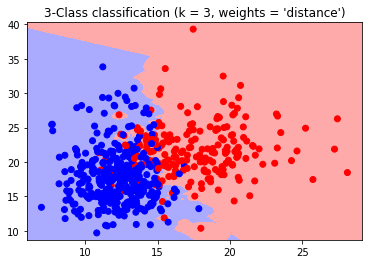

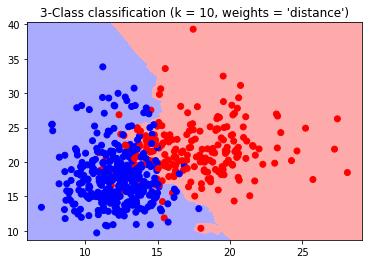

[(3, 1.0), (10, 1.0)]


In [22]:
## Visualization of the decision boundaries

h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

n_neighbors = 15
weights = 'distance'

clf_train_score_list = []
for n_neighbors in [3,10]:
    clf = neighbors.KNeighborsClassifier(n_neighbors,
                                         weights=weights)
    clf.fit(X, y)
    
    clf_train_score = clf.score(X, y)
    clf_train_score_list.append((n_neighbors, clf_train_score))
    # Plot the decision boundary.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()
print(clf_train_score_list)

In [23]:
clf_train_score_list = []

score_knn_train = []
score_knn_test = [] 

for i in range(1,10):
    cancer_knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    cancer_knn.fit(X_train, y_train)
    knn_score_train = cancer_knn.score(X_train, y_train)
    score_knn_train.append(knn_score_train)

for i in range(1,10):
    cancer_knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    cancer_knn.fit(X_train, y_train)
    knn_score = cancer_knn.score(X_test, y_test)
    score_knn_test.append(knn_score)
    
print(score_knn_train)
print(score_knn_test)

[1.0, 0.9714285714285714, 0.9516483516483516, 0.9494505494505494, 0.9516483516483516, 0.9406593406593406, 0.9384615384615385, 0.9340659340659341, 0.9384615384615385]
[0.9035087719298246, 0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315]


In [24]:
train_test = {'training_score': score_knn_train, 
              'testing_score': score_knn_test}
df2 = pd.DataFrame(train_test)
df2

,testing_score,training_score
0,0.903509,1.000000
1,0.903509,0.971429
2,0.929825,0.951648
3,0.938596,0.949451
4,0.938596,0.951648
5,0.938596,0.940659
6,0.947368,0.938462
7,0.947368,0.934066
8,0.947368,0.938462


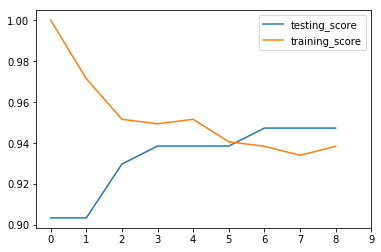

In [25]:
df2.plot()
plt.xticks(range(0,10))
plt.show()

In [26]:
#THIS IS OUR FINAL ACCURACY MEASUREMENT FOR THE KNN MODEL
T_accuracy_KNN = float(df2[3:4].testing_score.values)
print('Accuracy on test data for decision tree model: '
      + str(np.round(T_accuracy_KNN,4)))

Accuracy on test data for decision tree model: 0.9386


In [27]:
max(T_accuracy_decision_tree, T_accuracy_KNN, T_accuracy_Logistic)
print(T_accuracy_decision_tree)
print(T_accuracy_KNN)
print(T_accuracy_Logistic)

0.9736842105263158
0.9385964912280702
0.9473684210526315


By comparing predictive accuracy rate among thhree models, decision tree (0.9737), logistic regression (0.9474), and KNN (0.9386), I found out that Decision Tree has the highest one.